In [1]:
from pyspark.sql import SparkSession
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
def create_spark_session():
    '''Create a spark session'''
    spark = SparkSession \
    .builder\
    .master("local") \
    .appName("MODEC") \
    .config("spark.executor.memory", "2gb") \
    .getOrCreate()
    return spark



def read_gold(spark, file_path):
    '''
    Read parquet files
    on the silver path

    Parameters:
    spark : Spark Session
    file_path (str): Path to input data
    '''
    try:
        df_data = spark.read.parquet(file_path)
        return df_data
    except IOError:
        print('read error')

In [3]:
spark = create_spark_session()

In [4]:
fact =read_gold(spark, 'datalake/gold/fact')

In [5]:
fact_pd = fact.toPandas()

In [6]:
fact_pd.describe()

,sensor_id,equipment_id,error,temperature,vibration,day,week,month,year,weekday
count,36979.000000,36979.000000,36979.0,36979.000000,36979.000000,36979.000000,36979.000000,36979.000000,36979.000000,36979.000000
mean,49.453176,7.219963,1.0,249.136536,19.920481,14.754726,18.477055,4.870819,2019.691311,3.949377
std,28.578414,3.762353,0.0,144.589005,5769.949707,8.938101,20.471974,4.800171,0.461959,1.989882
min,1.000000,1.000000,1.0,0.020000,-9999.980469,1.000000,1.000000,1.000000,2019.000000,1.000000
25%,24.000000,4.000000,1.0,123.849998,-4976.694824,7.000000,4.000000,1.000000,2019.000000,2.000000
50%,49.000000,7.000000,1.0,249.160004,15.020000,14.000000,8.000000,2.000000,2020.000000,4.000000
75%,74.000000,11.000000,1.0,373.655014,5005.324951,22.000000,49.000000,12.000000,2020.000000,6.000000
max,100.000000,13.000000,1.0,499.940002,9999.969727,31.000000,52.000000,12.000000,2020.000000,7.000000


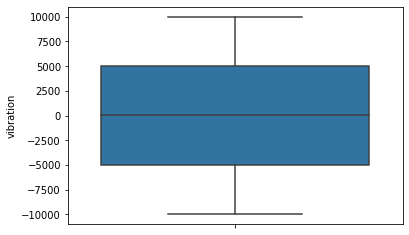

In [7]:
sns.boxplot( y=fact_pd["vibration"] );
plt.show()

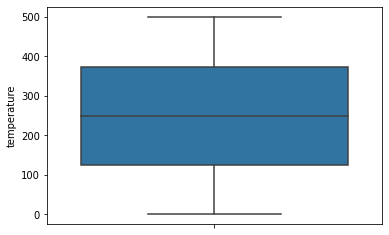

In [8]:
sns.boxplot( y=fact_pd["temperature"] );
plt.show()

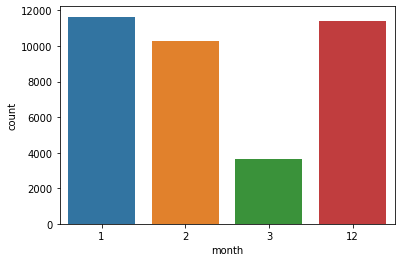

In [9]:
sns.countplot(fact_pd['month']);

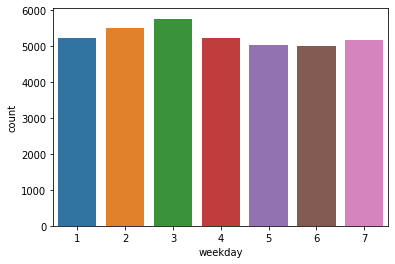

In [10]:
sns.countplot(fact_pd['weekday']);

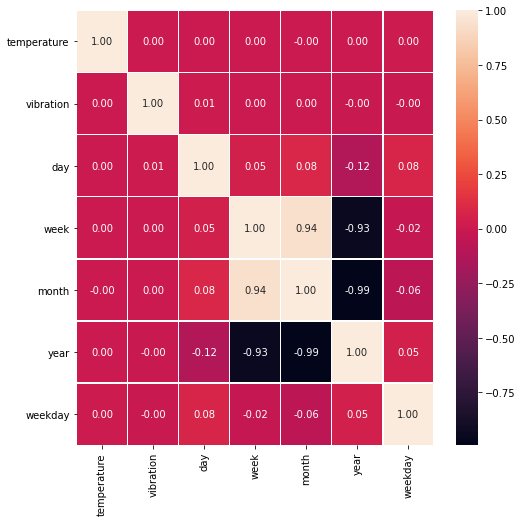

In [11]:
fact_corr = fact_pd.iloc[:, 6:13]
f,ax = plt.subplots(figsize=(8, 8))
sns.heatmap(fact_corr.corr(), annot=True, linewidths=.4, fmt= '.2f',ax=ax)
plt.show()